<a href="https://colab.research.google.com/github/essteer/data-science/blob/main/src/neural/nets/tensorflow_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow CNN - CIFAR-10

In [ ]:
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
# Dropout Regularization: To get rid of overfitting problem
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

## Load train and test data

In [ ]:
# The data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}")
print(f"X_test dimensions:  {X_test.shape}")
print(f"y_test dimensions:  {y_test.shape}")

X_train dimensions: (50000, 32, 32, 3)
y_train dimensions: (50000, 1)
X_test dimensions:  (10000, 32, 32, 3)
y_test dimensions:  (10000, 1)


In [ ]:
# Get no. unique values from train set
unique_values, counts = np.unique(y_train, return_counts=True)
unique_values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Get no. unique values from test set
unique_values, counts = np.unique(y_test, return_counts=True)
unique_values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# 10 different digits
num_classes = 10
# Image dimensions
img_rows, img_cols = 32, 32

## Transform data

In [ ]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

In [ ]:
input_shape

(32, 32, 3)

In [ ]:
# Convert data types for train and test data
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [ ]:
print(X_train[0])

[[[ 59.  62.  63.]
  [ 43.  46.  45.]
  [ 50.  48.  43.]
  ...
  [158. 132. 108.]
  [152. 125. 102.]
  [148. 124. 103.]]

 [[ 16.  20.  20.]
  [  0.   0.   0.]
  [ 18.   8.   0.]
  ...
  [123.  88.  55.]
  [119.  83.  50.]
  [122.  87.  57.]]

 [[ 25.  24.  21.]
  [ 16.   7.   0.]
  [ 49.  27.   8.]
  ...
  [118.  84.  50.]
  [120.  84.  50.]
  [109.  73.  42.]]

 ...

 [[208. 170.  96.]
  [201. 153.  34.]
  [198. 161.  26.]
  ...
  [160. 133.  70.]
  [ 56.  31.   7.]
  [ 53.  34.  20.]]

 [[180. 139.  96.]
  [173. 123.  42.]
  [186. 144.  30.]
  ...
  [184. 148.  94.]
  [ 97.  62.  34.]
  [ 83.  53.  34.]]

 [[177. 144. 116.]
  [168. 129.  94.]
  [179. 142.  87.]
  ...
  [216. 184. 140.]
  [151. 118.  84.]
  [123.  92.  72.]]]


In [ ]:
# Scale train and test data
X_train /= 255.
X_test /= 255.

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")

X_train shape: (50000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)


In [ ]:
# Convert labels (0 to 9) to binary class matrices with one-hot encoding
# e.g. 9 => 0 0 0 0 0 0 0 0 0 1 and 3 => 0 0 0 1 0 0 0 0 0 0
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Verify one-hot encoding
print(y_train[0:4])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Model 1

### Prepare model for training

In [ ]:
# Initialise the model
model = Sequential()

In [ ]:
num_classes

10

In [ ]:
input_shape

(32, 32, 3)

In [ ]:
# Create CNN to classify images
model.add(Conv2D(
    64,  # increase number of filters - used 32 on the 28x28x1 MNIST and fashion_MNIST sets
    kernel_size=(3, 3),
    activation="relu",
    input_shape=input_shape))
model.add(BatchNormalization())
# Add second convolutional layer for further feature extractions
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(BatchNormalization())
# First pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

### Compile the CNN

In [ ]:
# Define compile to minimise categorical loss, use ada delta optimized, and optimize to maXimizing accuracy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

### Train the model

Train the model and test/validate with the test data after each cycle (epoch) through the training data.

In [ ]:
batch_size = 64
epochs = 10

In [ ]:
# Return history of loss and accuracy for each epoch
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 93s 116ms/step - loss: 1.3708 - accuracy: 0.5129 - val_loss: 1.2198 - val_accuracy: 0.5639
Epoch 2/10
782/782 [==============================] - 89s 113ms/step - loss: 0.9674 - accuracy: 0.6588 - val_loss: 1.1025 - val_accuracy: 0.6329
Epoch 3/10
782/782 [==============================] - 82s 105ms/step - loss: 0.8148 - accuracy: 0.7109 - val_loss: 0.8396 - val_accuracy: 0.7139
Epoch 4/10
782/782 [==============================] - 86s 110ms/step - loss: 0.7216 - accuracy: 0.7447 - val_loss: 0.8191 - val_accuracy: 0.7180
Epoch 5/10
782/782 [==============================] - 89s 114ms/step - loss: 0.6531 - accuracy: 0.7680 - val_loss: 0.8171 - val_accuracy: 0.7224
Epoch 6/10
782/782 [==============================] - 88s 112ms/step - loss: 0.5941 - accuracy: 0.7914 - val_loss: 0.7356 - val_accuracy: 0.7537
Epoch 7/10
782/782 [==============================] - 91s 117ms/step - loss: 0.5436 - accuracy: 0.8086 - val_loss: 0.7554 - val_ac

In [ ]:
# Evaluate model with test data to get scores on "real" data
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss:      {score[0]:.2%}")
print(f"Test accuracy:  {score[1]:.2%}")

Test loss:      77.28%
Test accuracy:  76.60%


### Plot results

In [ ]:
palette = {
    "dark": "#252b33", "grey": "#45464d", "light": "#fefeff",
    "stone": "#8f8f94", "blue": "#336681", "green": "#089389",
    "red": "#d34748", "pink": "#cf82d3", "yellow": "#e6daaa"
}

In [ ]:
def format_plot(fig):
    """
    Applies custom theme to Plotly figure.
    """
    fig.update_layout(
        plot_bgcolor=palette["dark"], paper_bgcolor=palette["dark"],
        title_font_color=palette["light"],
        xaxis_title_font_color=palette["light"], yaxis_title_font_color=palette["light"],
        xaxis_tickfont_color=palette["stone"], yaxis_tickfont_color=palette["stone"],
        xaxis_gridcolor=palette["grey"], yaxis_gridcolor=palette["grey"],
        xaxis_linecolor=palette["stone"], yaxis_linecolor=palette["stone"],
        title={"x": 0.5},  # Center title
        xaxis={"categoryorder": "category ascending"},  # Set y-axis labels from low to high
        yaxis={
            "categoryorder": "category ascending",  # Set y-axis labels from low to high
            # Add invisible y-ticks to add space between y-axis and y-labels
            "ticks": "outside", "tickcolor": palette["dark"], "ticklen": 5,
        },
        legend_font_color=palette["stone"],
        margin=dict(l=80, r=20, t=40, b=20)
    )
    fig.update_yaxes(
        title_standoff = 5
    )

In [ ]:
# Get per-epoch data from history
epoch_list = list(range(1, len(hist.history["accuracy"]) + 1))  # values for x axis [1, 2, ..., # of epochs]

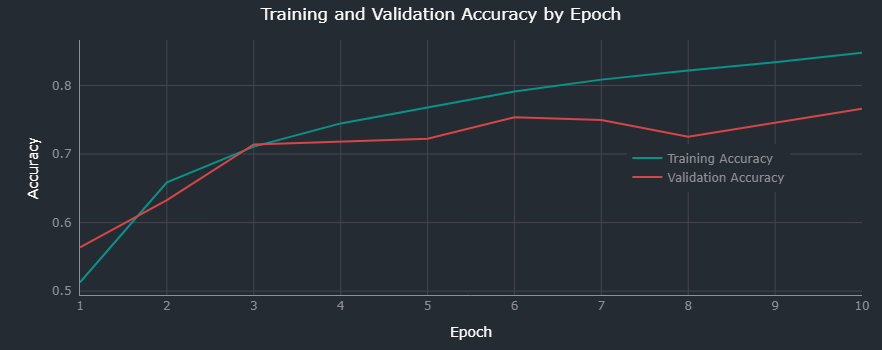

In [ ]:
# Plot data to see relationships between training and validation data
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=epoch_list, y=hist.history["accuracy"],
    mode="lines", name="Training Accuracy", line=dict(color=palette["green"])))
fig.add_trace(go.Scatter(
    x=epoch_list, y=hist.history["val_accuracy"],
    mode="lines", name="Validation Accuracy", line=dict(color=palette["red"])))

fig.update_layout(
    title="Training and Validation Accuracy by Epoch",
    xaxis=dict(title="Epoch"), yaxis=dict(title="Accuracy"),
    height=350, width=600, legend=dict(x=0.7, y=0.5))

format_plot(fig)
fig.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_3 (Bat  (None, 30, 30, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                      

## Model 2 - SGD

### Prepare model for training

In [ ]:
# Initialise the model
model_2 = Sequential()

In [ ]:
num_classes

10

In [ ]:
input_shape

(32, 32, 3)

In [ ]:
# Create CNN to classify images
model_2.add(Conv2D(32, kernel_size=(3, 3), activation="relu", kernel_initializer="he_uniform", padding="same", input_shape=input_shape))
model_2.add(BatchNormalization())
model_2.add(Conv2D(32, kernel_size=(3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
# Second convolution block
model_2.add(Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.5))
# Third convolution block
model_2.add(Conv2D(128, kernel_size=(3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
model_2.add(BatchNormalization())
model_2.add(Conv2D(128, kernel_size=(3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
# Classification block
model_2.add(Flatten())
# model_2.add(Dense(256, activation="relu", kernel_initializer="he_uniform"))
# model_2.add(BatchNormalization())
# model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes, activation="softmax"))

### Compile the CNN

In [ ]:
# Define compile to minimise categorical loss, use ada delta optimized, and optimize to maXimizing accuracy
model_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              metrics=["accuracy"])

### Train the model

In [ ]:
batch_size = 64
epochs = 20

In [ ]:
# Return history of loss and accuracy for each epoch
hist = model_2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/20
782/782 [==============================] - 152s 192ms/step - loss: 1.5753 - accuracy: 0.4346 - val_loss: 1.4741 - val_accuracy: 0.4633
Epoch 2/20
782/782 [==============================] - 138s 176ms/step - loss: 1.2019 - accuracy: 0.5686 - val_loss: 1.0154 - val_accuracy: 0.6401
Epoch 3/20
782/782 [==============================] - 141s 181ms/step - loss: 1.0386 - accuracy: 0.6299 - val_loss: 0.9143 - val_accuracy: 0.6763
Epoch 4/20
782/782 [==============================] - 141s 180ms/step - loss: 0.9277 - accuracy: 0.6737 - val_loss: 0.9127 - val_accuracy: 0.6819
Epoch 5/20
782/782 [==============================] - 144s 184ms/step - loss: 0.8559 - accuracy: 0.7006 - val_loss: 0.8762 - val_accuracy: 0.6980
Epoch 6/20
782/782 [==============================] - 136s 174ms/step - loss: 0.8050 - accuracy: 0.7165 - val_loss: 0.7841 - val_accuracy: 0.7259
Epoch 7/20
782/782 [==============================] - 129s 165ms/step - loss: 0.7669 - accuracy: 0.7305 - val_loss: 0.6852 -

In [ ]:
# Get per-epoch data from history
epoch_list = list(range(1, len(hist.history["accuracy"]) + 1))  # values for x axis [1, 2, ..., # of epochs]

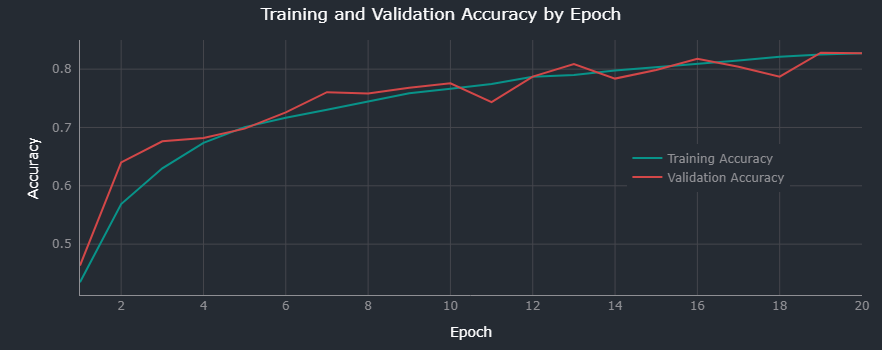

In [ ]:
# Plot data to see relationships between training and validation data
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=epoch_list, y=hist.history["accuracy"],
    mode="lines", name="Training Accuracy", line=dict(color=palette["green"])))
fig.add_trace(go.Scatter(
    x=epoch_list, y=hist.history["val_accuracy"],
    mode="lines", name="Validation Accuracy", line=dict(color=palette["red"])))

fig.update_layout(
    title="Training and Validation Accuracy by Epoch",
    xaxis=dict(title="Epoch"), yaxis=dict(title="Accuracy"),
    height=350, width=600, legend=dict(x=0.7, y=0.5))

format_plot(fig)
fig.show()

In [ ]:
model_2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_54 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_64 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_55 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                     